In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the data
file_path = r'C:\GitHub\self_dev\uni_stuff\NLP\NLP\src\results.tsv'

data = pd.read_csv(file_path, sep='\t')

# Filter the baseline data
baseline_data = data[data['train_lang'] == 'baseline']

# Loop over each unique 'train_lang'
for train_lang in data['train_lang'].unique():
    # Filter data for the current 'train_lang'
    train_lang_data = data[data['train_lang'] == train_lang]

    # Create a line plot
    fig = px.line(train_lang_data, x='num_train_files', y='span_f1', color='test_lang', labels={'span_f1':'Span F1 Score', 'num_train_files':'Number of Training Files'}, title=f'Span F1 Score for {train_lang} Training Language')

    # Add the baseline model to the plot
    if train_lang in baseline_data['test_lang'].unique():
        baseline_value = baseline_data[baseline_data['test_lang'] == train_lang]['span_f1'].values[0]
        fig.add_shape(
            type="line",
            x0=0,
            y0=baseline_value,
            x1=max(train_lang_data['num_train_files']),
            y1=baseline_value,
            line=dict(
                color="LightSeaGreen",
                width=4,
                dash="dashdot",
            ),
            name=f'Baseline {train_lang}'
        )

    fig.show()

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the data
file_path = r'C:\Users\bogdan\Desktop\Uni\NLP\src\results.tsv'

data = pd.read_csv(file_path, sep='\t')

# Filter the baseline data
baseline_data = data[data['train_lang'] == 'baseline']

# Loop over each unique 'test_lang'
for test_lang in data['test_lang'].unique():
    # Filter data for the current 'test_lang'
    test_lang_data = data[data['test_lang'] == test_lang]

    # Create a line plot
    fig = px.line(test_lang_data, x='num_train_files', y='span_f1', color='train_lang', labels={'span_f1':'Span F1 Score', 'num_train_files':'Number of Training Files'}, title=f'Span F1 Score for {test_lang} Test Language')

    # Add the baseline model to the plot
    if test_lang in baseline_data['test_lang'].unique():
        baseline_value = baseline_data[baseline_data['test_lang'] == test_lang]['span_f1'].values[0]
        fig.add_shape(
            type="line",
            x0=0,
            y0=baseline_value,
            x1=max(test_lang_data['num_train_files']),
            y1=baseline_value,
            line=dict(
                color="LightSeaGreen",
                width=4,
                dash="dashdot",
            ),
            name=f'Baseline {test_lang}'
        )

    fig.show()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = r'C:\GitHub\self_dev\uni_stuff\NLP\NLP\src\results.tsv'

data = pd.read_csv(file_path, sep='\t')

# Define a list of colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Loop over each unique 'train_lang'
for train_lang in data['train_lang'].unique():
    # Filter data for the current 'train_lang'
    train_lang_data = data[data['train_lang'] == train_lang]

    # Create a new figure
    plt.figure()

    # Loop over each unique 'test_lang' in the current 'train_lang' data
    for i, test_lang in enumerate(train_lang_data['test_lang'].unique()):
        # Filter data for the current 'test_lang'
        test_lang_data = train_lang_data[train_lang_data['test_lang'] == test_lang]

        # Create a line plot with a specific color
        plt.plot(test_lang_data['num_train_files'], test_lang_data['span_f1'], label=test_lang, color=colors[i % len(colors)])

    # Add the baseline model to the plot
    plt.axhline(y=0, color='black', linestyle='--', label='Baseline')

    # Add labels and title
    plt.xlabel('Number of Training Files')
    plt.ylabel('Span F1 Score')
    plt.title(f'Span F1 Score for {train_lang} Training Language')
    plt.legend()

    # Show the plot
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\bogdan\\Desktop\\Uni\\NLP\\src\\results.tsv'

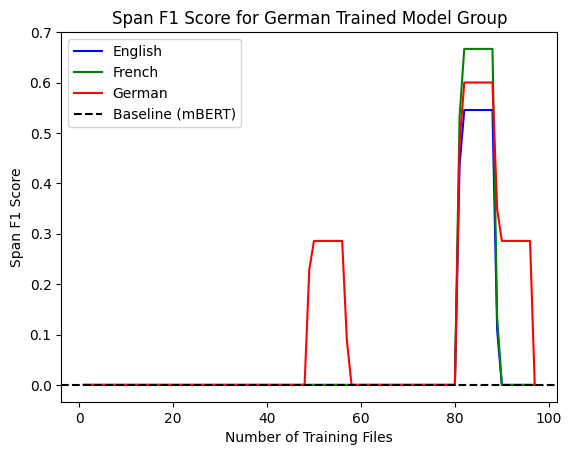

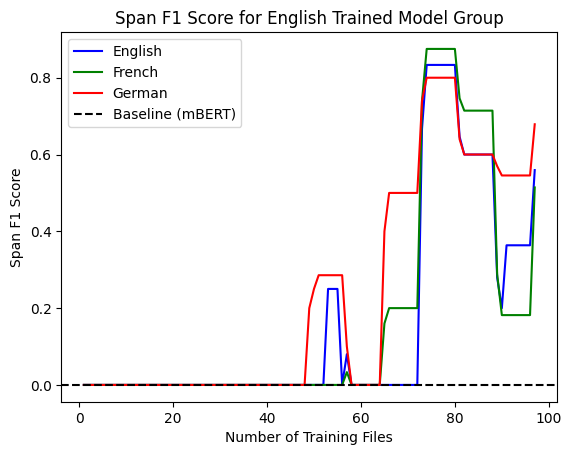

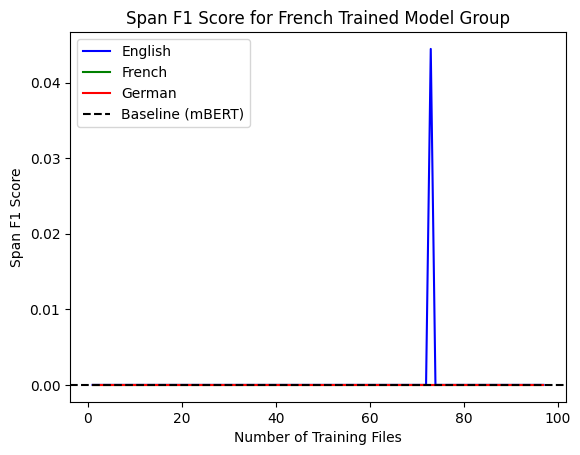

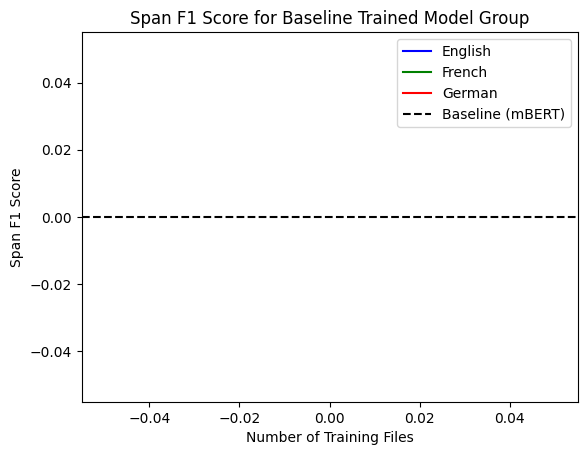

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = r'C:\GitHub\self_dev\uni_stuff\NLP\NLP\src\results.tsv'

data = pd.read_csv(file_path, sep='\t')

# Define a list of colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Define a dictionary to map language codes to full names
lang_dict = {'en': 'English', 'fr': 'French', 'de': 'German'}

# Loop over each unique 'train_lang'
for train_lang in data['train_lang'].unique():
    # Filter data for the current 'train_lang'
    train_lang_data = data[data['train_lang'] == train_lang]

    # Create a new figure
    plt.figure()

    # Loop over each unique 'test_lang' in the current 'train_lang' data
    for i, test_lang in enumerate(train_lang_data['test_lang'].unique()):
        # Filter data for the current 'test_lang'
        test_lang_data = train_lang_data[train_lang_data['test_lang'] == test_lang]

        # Get the full name for the test language
        test_lang_full = lang_dict.get(test_lang, test_lang)

        # Create a line plot with a specific color
        plt.plot(test_lang_data['num_train_files'], test_lang_data['span_f1'], label=test_lang_full, color=colors[i % len(colors)])

    # Add the baseline model to the plot
    plt.axhline(y=0, color='black', linestyle='--', label='Baseline (mBERT)')

    # Add labels and title
    plt.xlabel('Number of Training Files')
    plt.ylabel('Span F1 Score')
    plt.title(f'Span F1 Score for {train_lang.capitalize()} Trained Model Group')
    plt.legend()

    # Show the plot
    plt.show()
